In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Make bar chart for PEW 2022 polling averages

In [ ]:
#Read in file and make shorter issue names

pew = pd.read_excel('Pew Issue Polling 2022.xlsx')
pew = pew.rename(columns={
 'Issues around race and ethnicity':'Race and ethnicity',
 'Supreme Court appointments':'Supreme Court',
 'Size and scope of federal government': 'Size of gov',
 'Climate change': 'Climate change',
 'Voting policies': 'Voting policies',
 'The coronavirus outbreak': 'COVID outbreak',
 'Future of Democracy in the country': 'Future of Democracy',
 'Investigations into Trump':'Trump Investigations',
 'Investigations into Biden': 'Biden Investigations'})

In [20]:
#functions to make chart

#Data Manipulation
def change_data (df):
    #Manual split-apply(is it still an apply if you're just applying a variable name?)-combine
    republican = pew[['issue','Repub','Repub.1','Repub.2']].copy()
    republican['party'] = 'Republicans'
    republican = republican.rename(columns={"Repub": "March", "Repub.1": "August", "Repub.2": "October"})
    democrat = pew[['issue','Dem','Dem.1','Dem.2']].copy()
    democrat['party'] = 'Democrats'
    democrat = democrat.rename(columns={"Dem": "March", "Dem.1": "August", "Dem.2": "October"})
    final = pd.concat([republican, democrat]).reset_index(drop=True).sort_values(by='issue')
    
    #convert data into long form for visualization
    changedata = pd.melt(final, id_vars=['party','issue'], value_vars=['March','August','October'])

    return changedata

#Plot bar chart with Seaborn
def make_barchart (df):
    changedata=change_data (df)
    
    palette = {
        'Democrats': 'tab:blue',
        'Republicans': 'tab:red',
    }

    g = sns.catplot(
        data=average, kind="bar",
        x="issue", y="value", hue="party", legend = None,
        palette=palette, aspect=1.5)

    plt.xticks(rotation=(50), ha='right')
    plt.legend(loc='upper right', title='Party of Voter')
    #sns.move_legend(ax, "center right")
    #g.despine(left=True)
    g.set_axis_labels("","Percentage who say issue is VERY important" )
    g.fig.suptitle("Average Pew Issue Polling for 2022")
    
    return
        

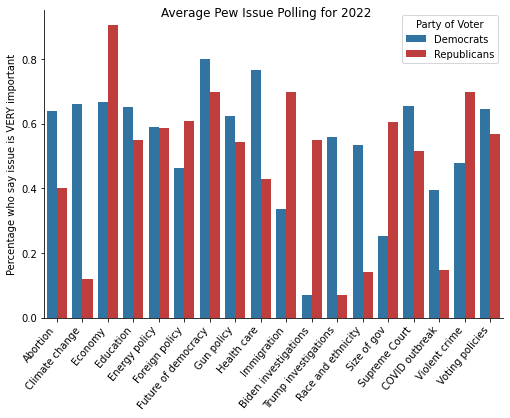

In [21]:
make_barchart(pew)